In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.preprocessing import MaxAbsScaler

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **CountPlot**

In [5]:
def CountPlot(x, title, x_size, y_size, save):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.countplot(x = x)

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")
    
    plt.ylabel("Count")
    plt.xlabel("")
    
    plt.gcf().set_size_inches(x_size, y_size)

    if (save != ""):
        plt.savefig(save)

    plt.show()
    plt.close()

## **Box Plot**

In [7]:
def PlotBoxPlotV3(df_x, df_y, title, size_x, size_y, save):
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor = "0.85")

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.grid(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color("black")
    plt.gca().spines['left'].set_color("black")

    plt.xlabel("")
    plt.ylabel("")

    plt.gcf().set_size_inches(size_x, size_y)

    if (save != ""):
        plt.savefig(save)

    plt.show()
    plt.close()

## **K-Fold Target Encoding**

In [9]:
def KFTE(df, df_test, categ_f, target):
  kf = KFold(n_splits = 5, shuffle = True, random_state = 13)

  nome = categ_f + "_E"

  df[nome] = 0.0

  for train_idx, val_idx in kf.split(df):
      fold_train = df.iloc[train_idx]
      fold_valid  = df.iloc[val_idx]

      medias_feature = fold_train.groupby(categ_f)[target].mean()
      media_global = fold_train[target].mean()

      feature_encoded = fold_valid[categ_f].map(medias_feature).fillna(media_global)
      df.loc[val_idx, nome] = feature_encoded

  mapping = df.groupby(categ_f)[target].mean().to_dict()
  global_mean = df[target].mean()

  df_test[categ_f] = df_test[categ_f].map(mapping).fillna(global_mean)

# **DATASET LOADING**

In [11]:
df = pd.read_csv("../data/processed/1.Data_Cleaning_train.csv")
df_test = pd.read_csv("../data/processed/1.Data_Cleaning_test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765


# **EXPLORATORY DATA ANALYSIS**

## **ENCODING**

### **Pclass**

In [15]:
df['Pclass_1'] = df['Pclass'].map({1: 1}).fillna(0)
df['Pclass_2'] = df['Pclass'].map({2: 1}).fillna(0)
df['Pclass_3'] = df['Pclass'].map({3: 1}).fillna(0)

df_test['Pclass_1'] =  df_test['Pclass'].map({1: 1}).fillna(0)
df_test['Pclass_2'] =  df_test['Pclass'].map({2: 1}).fillna(0)
df_test['Pclass_3'] =  df_test['Pclass'].map({3: 1}).fillna(0)

In [16]:
KFTE(df, df_test, 'Pclass', 'Survived')

df['Pclass'] = df['Pclass_E'].copy()
df = df.drop('Pclass_E', axis =1)

### **Sex**

In [18]:
df['IsMale'] = df['Sex'].map({'male': 1}).fillna(0)

df_test['IsMale'] = df_test['Sex'].map({'male': 1}).fillna(0)

### **Embarked**

In [20]:
df['Embarked_C'] = df['Embarked'].map({"C": 1}).fillna(0)
df['Embarked_Q'] = df['Embarked'].map({"Q": 1}).fillna(0)
df['Embarked_S'] = df['Embarked'].map({"S": 1}).fillna(0)

df_test['Embarked_C'] =  df_test['Embarked'].map({"C": 1}).fillna(0)
df_test['Embarked_Q'] =  df_test['Embarked'].map({"Q": 1}).fillna(0)
df_test['Embarked_S'] =  df_test['Embarked'].map({"S": 1}).fillna(0)

In [21]:
KFTE(df, df_test, 'Embarked', 'Survived')

df['Embarked'] = df['Embarked_E'].copy()
df = df.drop('Embarked_E', axis =1)

## **FEATURE ENGINEERING**

### **IsAgeEstimated**

In [24]:
df.loc[((df.Age > 1) & ((df.Age % 1) != 0)), ['IsAgeEstimated']] = 1
df['IsAgeEstimated'] = df['IsAgeEstimated'].fillna(0)

df_test.loc[((df_test.Age > 1) & ((df_test.Age % 1) != 0)), ['IsAgeEstimated']] = 1
df_test['IsAgeEstimated'] = df_test['IsAgeEstimated'].fillna(0)

### **Stage**

In [26]:
df.loc[(df.Age < 1), ['Stage']] = "Baby"
df.loc[((df.Age > 1) & (df.Age < 12)), ['Stage']] = "Child"
df.loc[((df.Age > 12) & (df.Age < 18)), ['Stage']] = "Teenager"
df.loc[(df.Age > 18), ['Stage']] = "Adult"
df.loc[(df.Age > 60), ['Stage']] = "Senior"

df_test.loc[(df_test.Age < 1), ['Stage']] = "Baby"
df_test.loc[((df_test.Age > 1) & (df_test.Age < 12)), ['Stage']] = "Child"
df_test.loc[((df_test.Age > 12) & (df_test.Age < 18)), ['Stage']] = "Teenager"
df_test.loc[(df_test.Age > 18), ['Stage']] = "Adult"
df_test.loc[(df_test.Age > 60), ['Stage']] = "Senior"

In [27]:
KFTE(df, df_test, 'Stage', 'Survived')

df['Stage'] = df['Stage_E'].copy()
df = df.drop('Stage_E', axis =1)

### **FreeFare**

In [29]:
df['FreeFare'] = df['Fare'].map({0: 1}).fillna(0)

df_test['FreeFare'] = df_test['Fare'].map({0: 1}).fillna(0)

### **IsSingle**

In [31]:
df.loc[(((df.Name.str.contains("Miss", na=False) == True) & (df.Age > 18))\
        | ((df.Sex == 'male') & (df.SibSp == 0) & (df.Age > 18))), ['IsSingle']] = 1
df['IsSingle'] = df['IsSingle'].fillna(0)


df_test.loc[(((df_test.Name.str.contains("Miss", na=False) == True) & (df_test.Age > 18))\
        | ((df_test.Sex == 'male') & (df_test.SibSp == 0) & (df_test.Age > 18))), ['IsSingle']] = 1
df_test['IsSingle'] = df_test['IsSingle'].fillna(0)

### **FarePerPerson**

In [33]:
df['FarePerPerson'] = df['Fare'] / df.groupby('Ticket').Ticket.transform('count')

df_test['FarePerPerson'] = df_test['Fare'] / df_test.groupby('Ticket').Ticket.transform('count')

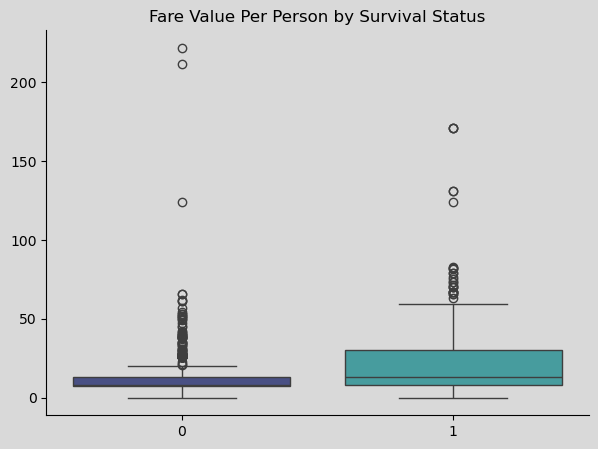

In [34]:
PlotBoxPlotV3(df['Survived'], df['FarePerPerson'], "Fare Value Per Person by Survival Status", 7, 5, "../visuals/2.EDA/FarePerPerson.png")

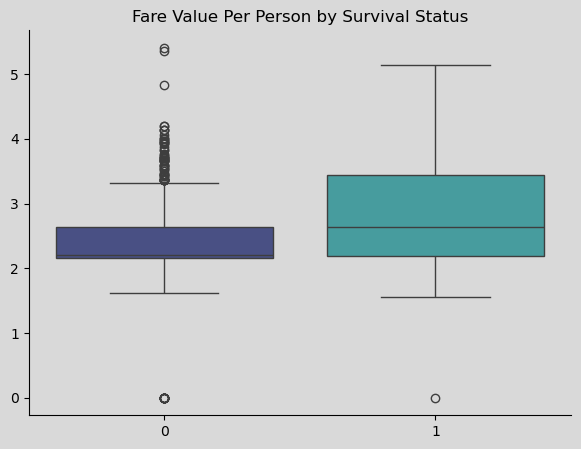

In [35]:
df['FarePerPerson'] = np.log1p(df['FarePerPerson'])
PlotBoxPlotV3(df['Survived'], df['FarePerPerson'], "Fare Value Per Person by Survival Status", 7, 5, "../visuals/2.EDA/FarePerPerson_log.png")

In [36]:
df_test['FarePerPerson'] = np.log1p(df_test['FarePerPerson'])

### **FamilySize**

In [38]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

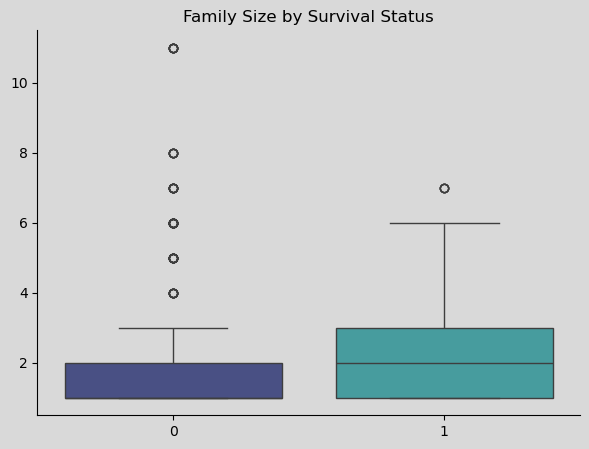

In [39]:
PlotBoxPlotV3(df['Survived'], df['FamilySize'], "Family Size by Survival Status", 7, 5, "../visuals/2.EDA/FamilySize.png")

### **IsAlone**

In [41]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df_test['IsAlone'] = (df_test['FamilySize'] == 1).astype(int)

### **Title**

In [43]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df['Title'].value_counts(normalize=True) * 100

Title
Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Mlle         0.224467
Major        0.224467
Col          0.224467
Countess     0.112233
Capt         0.112233
Ms           0.112233
Sir          0.112233
Lady         0.112233
Mme          0.112233
Don          0.112233
Jonkheer     0.112233
Name: proportion, dtype: float64

In [44]:
df['Title'] = df['Title'].map({"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs"}).fillna("Other")

df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
df_test['Title'] = df_test['Title'].map({"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs"}).fillna("Other")

KFTE(df, df_test, 'Title', 'Survived')

df['Title'] = df['Title_E'].copy()
df = df.drop('Title_E', axis =1)

### **Deck**

In [46]:
df['Deck'] = df['Cabin'].str[0]
df['Deck'] = df['Deck'].fillna('U')

df_test['Deck'] = df_test['Cabin'].str[0]
df_test['Deck'] = df_test['Deck'].fillna('U')

KFTE(df, df_test, 'Deck', 'Survived')

df['Deck'] = df['Deck_E'].copy()
df = df.drop('Deck_E', axis =1)

### **HasCabin**

In [48]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

df_test['HasCabin'] = df_test['Cabin'].notnull().astype(int)

## **TARGET VARIABLE ANALYSIS**

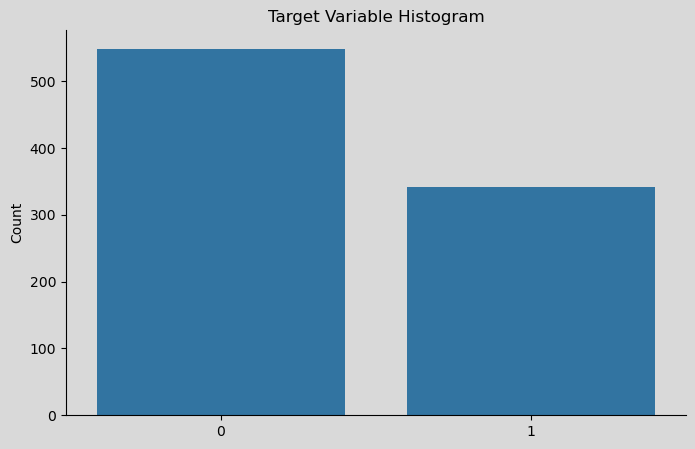

In [50]:
CountPlot(df['Survived'], "Target Variable Histogram", 8, 5, "../visuals/2.EDA/TargetVariableCountPlot.png")

## **NORMALIZATION**

In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Fare_log,Pclass_1,Pclass_2,Pclass_3,IsMale,Embarked_C,Embarked_Q,Embarked_S,IsAgeEstimated,Stage,FreeFare,IsSingle,FarePerPerson,FamilySize,IsAlone,Title,Deck,HasCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.384290,29.376734,0.523008,0.381594,32.204208,0.384019,2.962246,0.242424,0.206510,0.551066,0.647587,0.188552,0.086420,0.725028,0.218855,0.381881,0.016835,0.591470,2.599872,1.904602,0.602694,0.384046,0.383513,0.228956
std,257.353842,0.486592,0.165700,13.271555,1.102743,0.806057,49.693429,0.085496,0.969048,0.428790,0.405028,0.497665,0.477990,0.391372,0.281141,0.446751,0.413702,0.072712,0.128725,0.491838,0.764251,1.613459,0.489615,0.274177,0.162234,0.420397
min,1.000000,0.000000,0.225248,0.420000,0.000000,0.000000,0.000000,0.321083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,1.000000,0.000000,0.138015,0.285971,0.000000
25%,223.500000,0.000000,0.245478,22.000000,0.000000,0.000000,7.910400,0.339114,2.187218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363946,0.000000,0.000000,2.170480,1.000000,0.000000,0.160494,0.298535,0.000000
50%,446.000000,0.000000,0.251948,26.500000,0.000000,0.000000,14.454200,0.346743,2.737881,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.369863,0.000000,1.000000,2.287471,1.000000,1.000000,0.167866,0.303867,0.000000
75%,668.500000,1.000000,0.496644,36.000000,1.000000,0.000000,31.000000,0.351852,3.465736,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.370884,0.000000,1.000000,3.229039,2.000000,1.000000,0.697987,0.308797,0.000000
max,891.000000,1.000000,0.652439,80.000000,8.000000,6.000000,512.329200,0.592000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.406181,11.000000,1.000000,0.803738,0.875000,1.000000


In [53]:
data = df[['Age', 'SibSp', 'Parch', 'Fare_log', 'FarePerPerson', 'FamilySize']].copy()

Scaler = MaxAbsScaler()
data = pd.DataFrame(Scaler.fit_transform(data), columns = data.columns)

df['Age'] = data['Age'].copy()
df['SibSp'] = data['SibSp'].copy()
df['Parch'] = data['Parch'].copy()
df['Fare_log'] = data['Fare_log'].copy()
df['FarePerPerson'] = data['FarePerPerson'].copy()
df['FamilySize'] = data['FamilySize'].copy()

In [54]:
data = df_test[['Age', 'SibSp', 'Parch', 'Fare_log', 'FarePerPerson', 'FamilySize']].copy()

data = pd.DataFrame(Scaler.transform(data), columns = data.columns).copy()

df_test['Age'] = data['Age'].copy()
df_test['SibSp'] = data['SibSp'].copy()
df_test['Parch'] = data['Parch'].copy()
df_test['Fare_log'] = data['Fare_log'].copy()
df_test['FarePerPerson'] = data['FarePerPerson'].copy()
df_test['FamilySize'] = data['FamilySize'].copy()

# **SAVING PROCESSED DATASET**

In [56]:
df.to_csv('../data/processed/2.EDA_train.csv', index = False)

df_test.to_csv('../data/processed/2.EDA_test.csv', index = False)